## A1.5 Solución de problemas

***

**1.** Se importa la librería pandas así como los datos del archivo *A1.5 Calificaciones.csv*, así como se imprime el tipo de dato de cada variable del data frame.

In [4]:
import pandas as pd

data=pd.read_csv('Calificaciones.csv')
print(data.dtypes)

Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


***

**2.** Se transforman las variables categóricas con el objetivo que los nuevos datos sean útiles para el modelo de regresión lineal múltiple. 

En este punto es importante mencionar que a pesar de que la variable *HorasDeEstudio* es un número, realmente estos representan una clase y no un número en específco, es por esto que también se transforma esta variable. 

Se imprimen las primeras 5 observaciones del archivo modificado.

In [7]:
data = pd.get_dummies(data, columns=["Escuela", "Sexo", "Internet", "HorasDeEstudio"], drop_first=True)
print(data.head(5))

   Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
0    18           0       6   5   6   6       False   False         False   
1    17           0       4   5   5   6       False   False          True   
2    15           3      10   7   8  10       False   False          True   
3    15           0       2  15  14  15       False   False          True   
4    16           0       4   6  10  10       False   False         False   

   HorasDeEstudio_2  HorasDeEstudio_3  HorasDeEstudio_4  
0              True             False             False  
1              True             False             False  
2              True             False             False  
3             False              True             False  
4              True             False             False  


***

**3.** Se utiliza la variable *Faltas* para identificar valores atípicos con ayuda del método Tukey. Para esto se utiliza la k=3 y se imprimen las observaciones que se consideraron atípicas.

In [10]:
q1=data.Faltas.quantile(0.25)
q3=data.Faltas.quantile(0.75)
iqr=q3-q1
li=q1-(3*iqr)
ls=q3+(3*iqr)
out=data[(data['Faltas']<li) | (data['Faltas']>ls)]
print(out)

     Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
74     16           0      54  11  12  11       False   False          True   
183    17           0      56   9   9   8       False   False          True   
276    18           0      75  10   9   9       False   False          True   
307    19           1      38   8   9   8       False    True          True   
315    19           1      40  13  11  11       False   False          True   

     HorasDeEstudio_2  HorasDeEstudio_3  HorasDeEstudio_4  
74               True             False             False  
183              True             False             False  
276              True             False             False  
307             False             False             False  
315             False              True             False  


Los valores atípicos se eliminan puesto que son números muy grandes para ser consideradas como faltas.

In [12]:
if not out.empty:
    data=data[(data['Faltas']>=li) & (data['Faltas']<=ls)]

***

**4.** Se importan las liberías seaborn y matplotlib.pyplot para generar una matriz de correlaciones y un heatmap con el objetivo de encontrar de una manera más sencilla potenciales problemas de colinealidad.

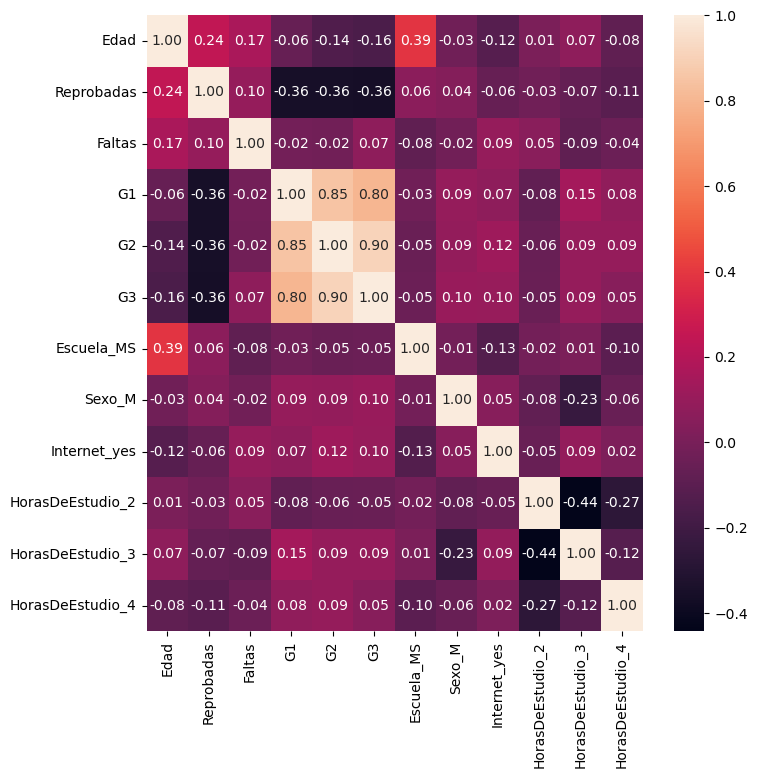

In [15]:
import seaborn as SNS
import matplotlib.pyplot as plot

correlation_matrix=data.corr()
plot.figure(figsize=(8,8))
SNS.heatmap(correlation_matrix,annot=True,fmt='.2f')
plot.show()

Se elimina la variable G2 por alta colinealidad con G3

In [17]:
data=data.drop(columns=["G2"])

***

**5.** Se incluyen términos de interacción para los pares de variables: *G1_G3* y *Edad_Reprobadas*. Luego, se imprimen las primeras 5 observaciones.

In [20]:
data["G1_G3"]=data["G1"]*data["G3"]
data["Edad_Reprobadas"]=data["Edad"]*data["Reprobadas"]
print(data.head(5))

   Edad  Reprobadas  Faltas  G1  G3  Escuela_MS  Sexo_M  Internet_yes  \
0    18           0       6   5   6       False   False         False   
1    17           0       4   5   6       False   False          True   
2    15           3      10   7  10       False   False          True   
3    15           0       2  15  15       False   False          True   
4    16           0       4   6  10       False   False         False   

   HorasDeEstudio_2  HorasDeEstudio_3  HorasDeEstudio_4  G1_G3  \
0              True             False             False     30   
1              True             False             False     30   
2              True             False             False     70   
3             False              True             False    225   
4              True             False             False     60   

   Edad_Reprobadas  
0                0  
1                0  
2               45  
3                0  
4                0  


***

**6.** Se importan diversas funciones de sklearn y la libería stasmodels.api. Finalmente, se entrena el modelo de regresión lineal múltiple dividiendo en 80% entrenamiento y 20% de prueba. Se agrega una gráfica de dispersión de las calificaciones reales vs las estimadas por el modelo en los datos de prueba. 

MSE: 2.288303597584685
R^2: 0.8878701748735082


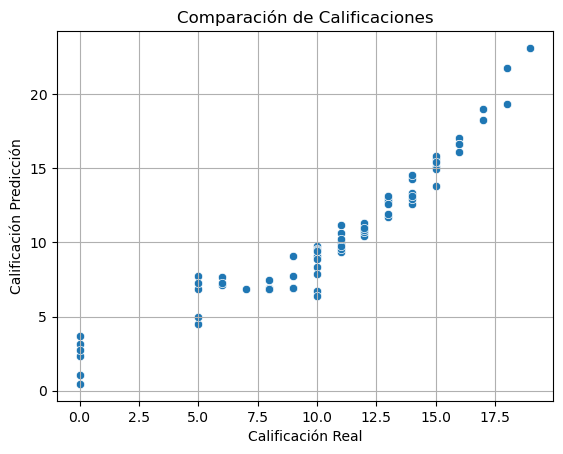

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

x=data.drop(columns=["G3"]) 
y=data["G3"]  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

SNS.scatterplot(x=y_test, y=y_pred)
plot.xlabel("Calificación Real")
plot.ylabel("Calificación Predicción")
plot.title("Comparación de Calificaciones")
plot.grid(True)
plot.show()

***

**Conclusión**
La gráfica de dispersión muestra qué tan bien se alinean las calificaciones de la predicción con las reales. En este caso los puntos siguen una línea cercana a la diagonal, indicando que el modelo tiene en general un buen desempeño. Existe una ligera dispersión, por lo que ajustes adicionales podrían mejorar este aspecto.

Adicional a esto, con base al Error Cuadrático Medio (MSE) se indica la magnitud promedio del error en las predicciones. Por otro lado, la R^2 de aprox. *0.89* muestra qué proporción de la variabilidad en la calificación final *G3* es explicada por el modelo, siendo este un valor cercano a 1 indicando un buen ajuste.